In [0]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 42.8MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 276kB 15.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=b8bf73422da5b9c4c6f3d653c1b3bfabd2a064a1fe39d1c3f967624a668ffda6
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pi

In [0]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 2.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200424-cp36-none-any.whl size=40523 sha256=38ff4df7530e3b1ee9dd820a596f17ee1f94c566dc86669b7259509a5d2c1fca
  Stored in directory: /root/.cache/pip/wheels/68/20/6d/36730421a68849a49c4c7470411f9192b7fa5ec9093cf1c7b8
Successfully built fvcore


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [0]:
!wget https://vibeweek.com/wp-content/uploads/2020/02/bc6fc254b459fce1b01f60aa63b9732e.jpg -O singers.jpg

--2020-04-29 10:05:44--  https://vibeweek.com/wp-content/uploads/2020/02/bc6fc254b459fce1b01f60aa63b9732e.jpg
Resolving vibeweek.com (vibeweek.com)... 199.127.61.96
Connecting to vibeweek.com (vibeweek.com)|199.127.61.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90900 (89K) [image/jpeg]
Saving to: ‘singers.jpg’

singers.jpg         100%[===================>]  88.77K   492KB/s    in 0.2s    

2020-04-29 10:05:44 (492 KB/s) - ‘singers.jpg’ saved [90900/90900]



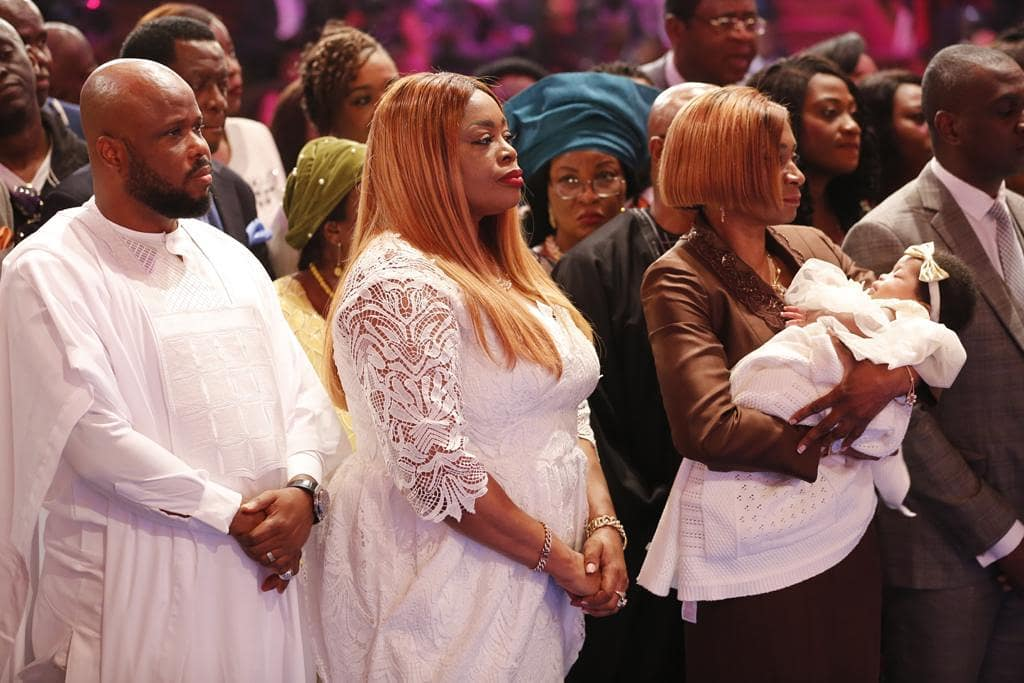

In [0]:
bless = cv2.imread('./singers.jpg')
cv2_imshow(image)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
#/content/gdrive/My Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/pictures/gb.jpeg'

In [0]:
bless = cv2.imread(path)

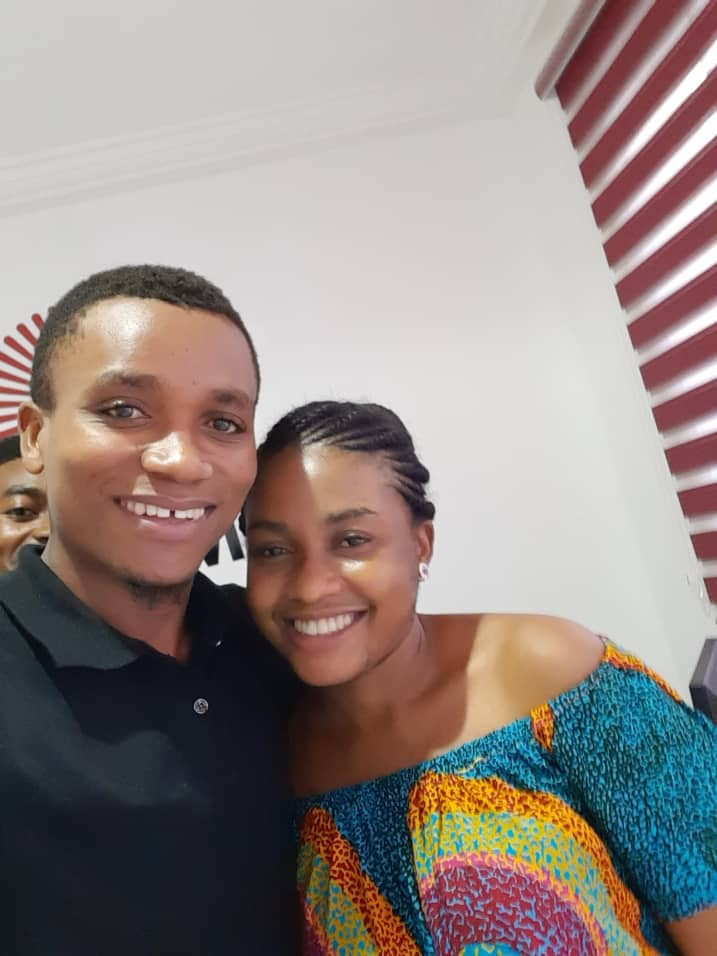

In [0]:
cv2_imshow(bless)
#bless

In [0]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [0]:
outputs = predictor(bless)

In [0]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        74], device='cuda:0')
Boxes(tensor([[0.0000e+00, 5.2084e+01, 3.3680e+02, 6.7740e+02],
        [3.0308e+02, 6.5263e+01, 6.3508e+02, 6.7667e+02],
        [6.3027e+02, 9.0284e+01, 9.6144e+02, 6.7462e+02],
        [8.5635e+02, 3.7501e+01, 1.0234e+03, 6.8139e+02],
        [0.0000e+00, 1.4574e+01, 9.1284e+01, 2.6414e+02],
        [6.2070e+02, 2.2508e+00, 7.6213e+02, 8.9676e+01],
        [2.7023e+02, 1.3666e+02, 3.7589e+02, 4.2366e+02],
        [1.3273e+02, 9.9561e+00, 2.9512e+02, 2.5521e+02],
        [9.9303e+02, 2.0012e+02, 1.0230e+03, 3.3031e+02],
        [2.9155e+02, 1.9535e+01, 3.9621e+02, 1.4988e+02],
        [4.8631e+02, 6.4510e+01, 6.5728e+02, 2.6718e+02],
        [7.4953e+02, 5.8553e+01, 8.6418e+02, 2.4270e+02],
        [4.7182e+02, 5.5962e+01, 5.4708e+02, 1.0894e+02],
        [8.4695e+02, 4.2507e+01, 1.0240e+03, 3.5044e+02],
        [5.4720e+02, 8.5813e+01, 7.1064e+02, 6.5342e+02],
        [8.559

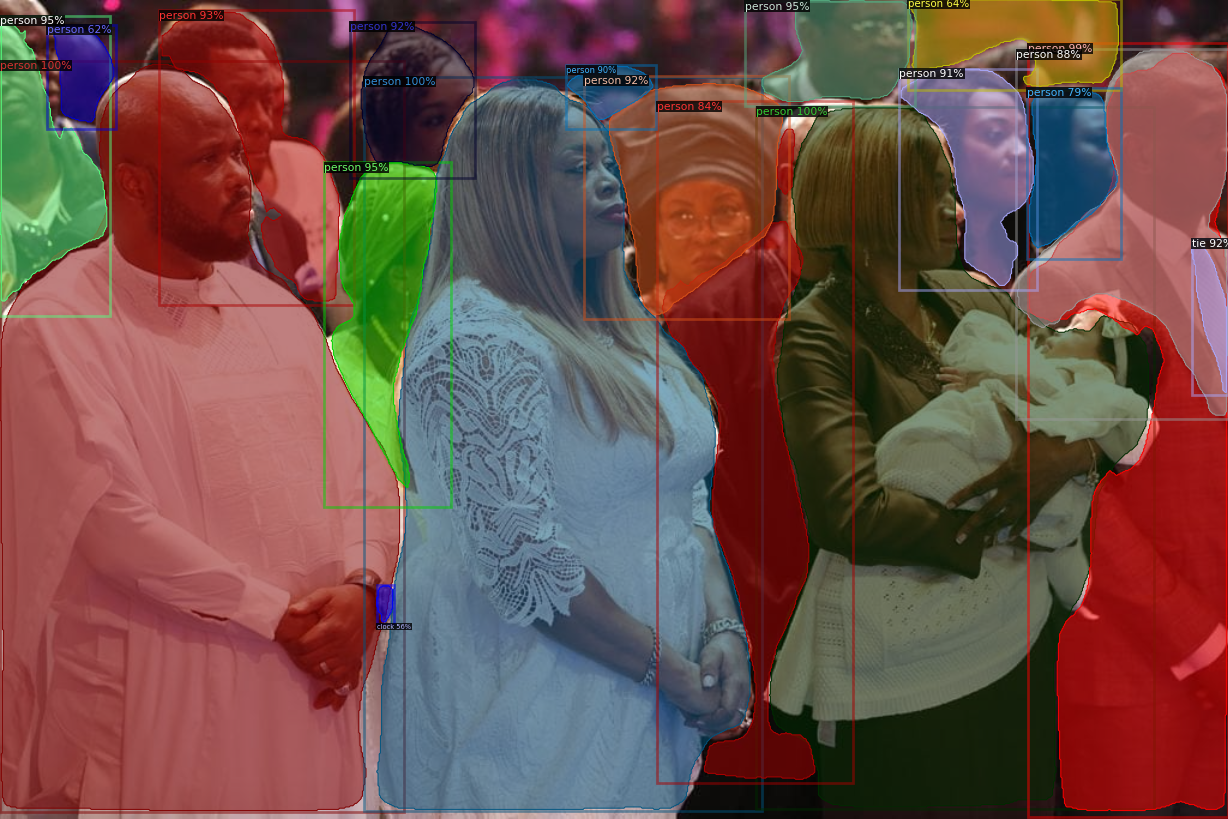

In [0]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(bless[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

Don't worry I know where we ended

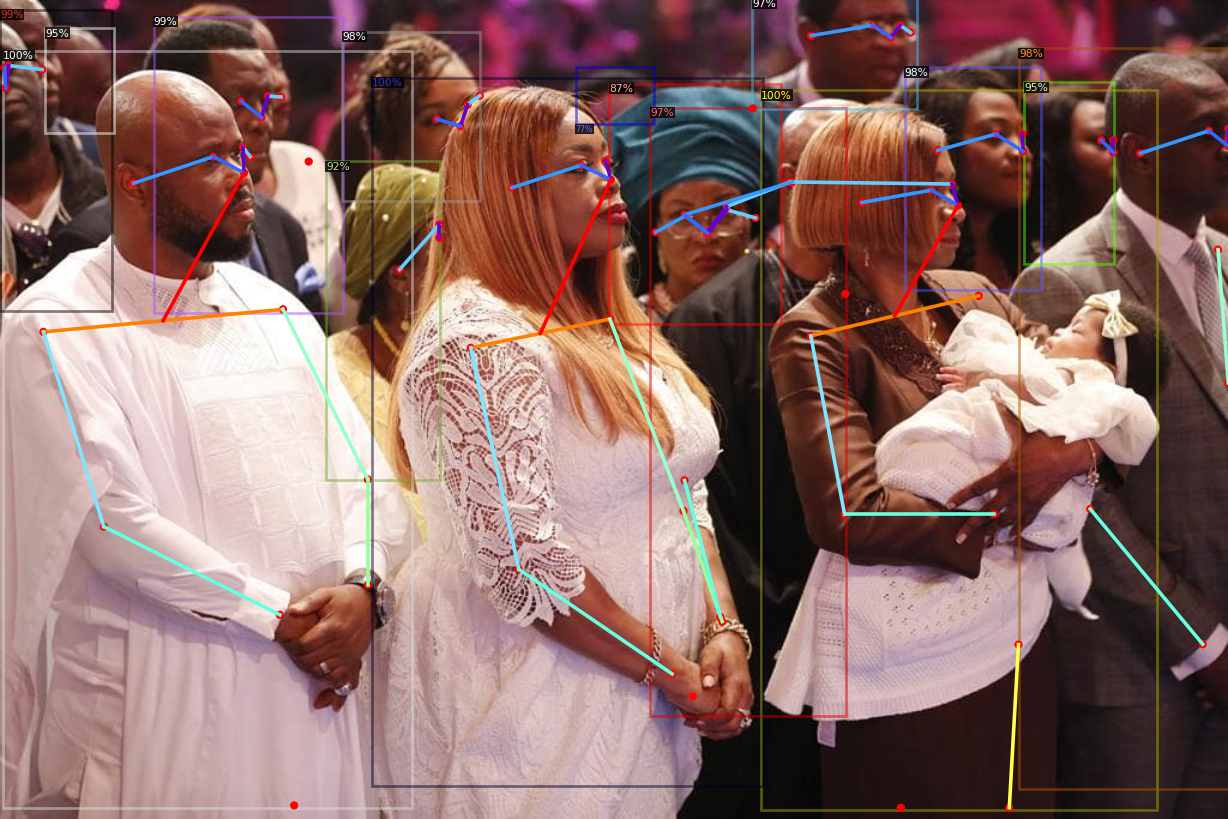

In [0]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)# configuring the model
outputs = predictor(bless)## computing the output predictions (pose)

#visualizing the output
v = Visualizer(bless[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])